<a href="https://colab.research.google.com/github/mafiTec/TECHIS-PY-HAILE./blob/main/Suicide_numbers_prediction_using_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KAG-2 PRO/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.drop(['country-year','HDI for year'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


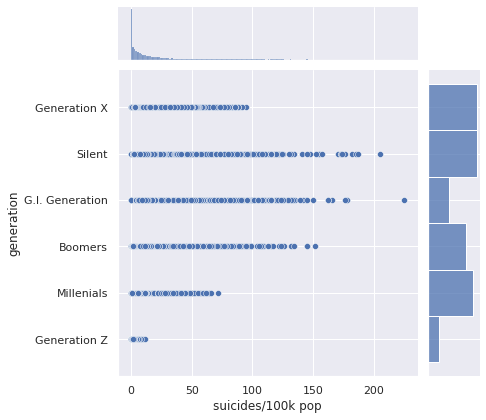

In [ ]:
sns.jointplot(x='suicides/100k pop', y='generation', data = df)

<Figure size 1440x720 with 0 Axes>

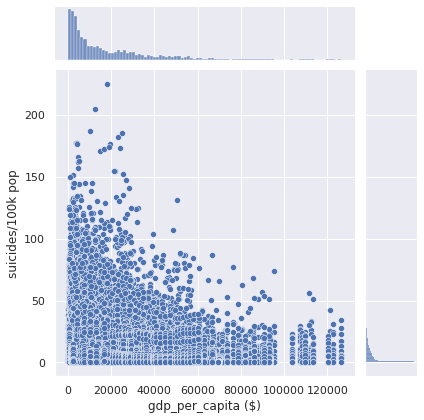

In [ ]:
plt.figure(figsize=(20,10))
sns.jointplot(x='gdp_per_capita ($)',y='suicides/100k pop', data = df)

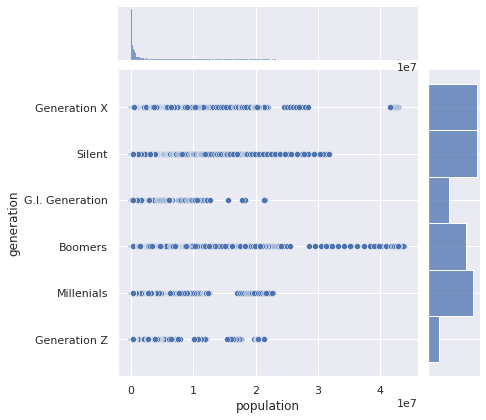

In [ ]:
sns.jointplot(x='population',y='generation', data = df)

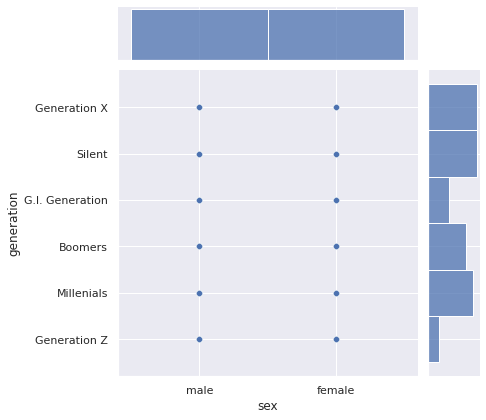

In [ ]:
sns.jointplot(x='sex',y='generation', data = df)

In [ ]:
GIgen = df[df.generation == 'G.I. Generation']
Sgen = df[df.generation == 'Silent']
Boomer = df[df.generation == 'Boomers']
genx = df[df.generation == 'Generation X']
Milen = df[df.generation == 'Millenials']
genz = df[df.generation == 'Generation Z']

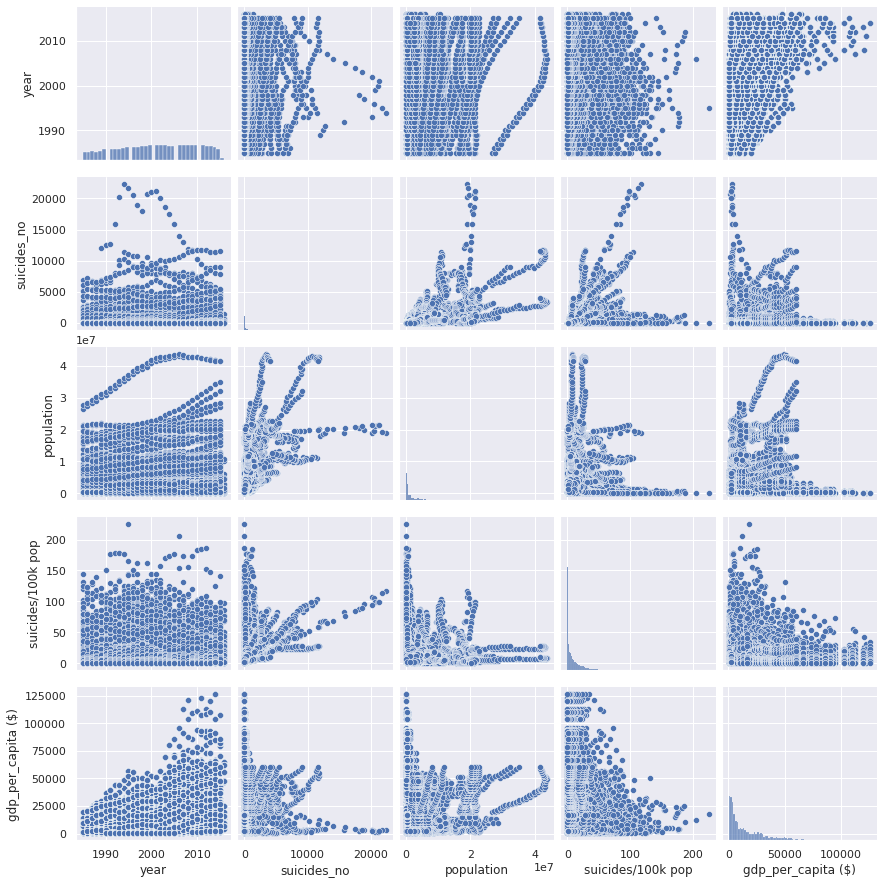

In [ ]:
sns.pairplot(df)

In [ ]:
df = df[['year','sex','age','suicides/100k pop','gdp_per_capita ($)','generation']]
df.head()

,year,sex,age,suicides/100k pop,gdp_per_capita ($),generation
0,1987,male,15-24 years,6.71,796,Generation X
1,1987,male,35-54 years,5.19,796,Silent
2,1987,female,15-24 years,4.83,796,Generation X
3,1987,male,75+ years,4.59,796,G.I. Generation
4,1987,male,25-34 years,3.28,796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides/100k pop   27820 non-null  float64
 4   gdp_per_capita ($)  27820 non-null  int64  
 5   generation          27820 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
status = pd.get_dummies(df['generation'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.drop(['generation'], axis = 1, inplace = True)

In [ ]:
status = pd.get_dummies(df['age'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.drop(['age'], axis = 1, inplace = True)

In [ ]:
status = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.drop(['sex'], axis = 1, inplace = True)

In [ ]:
df.columns


Index(['year', 'suicides/100k pop', 'gdp_per_capita ($)', 'G.I. Generation',
       'Generation X', 'Generation Z', 'Millenials', 'Silent', '25-34 years',
       '35-54 years', '5-14 years', '55-74 years', '75+ years', 'male'],
      dtype='object')

In [ ]:
print("suicides/100k pop")

suicides/100k pop


In [ ]:
x = df[['year','gdp_per_capita ($)', 'G.I. Generation',
       'Generation X', 'Generation Z', 'Millenials', 'Silent', '25-34 years',
       '35-54 years', '5-14 years', '55-74 years', '75+ years', 'male']]

In [ ]:
y = df['suicides/100k pop']

In [ ]:
from sklearn.model_selection import train_test_split      

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[-1.29689150e-01  1.71692418e-05 -1.30839703e-01  7.00200126e-01
  2.57770031e+00  1.12064929e+00 -1.35085628e+00  3.38327193e+00
  6.83052008e+00 -9.01522413e+00  8.81546203e+00  1.64622333e+01
  1.46359769e+01]


In [ ]:
prediction = lm.predict(x_test)

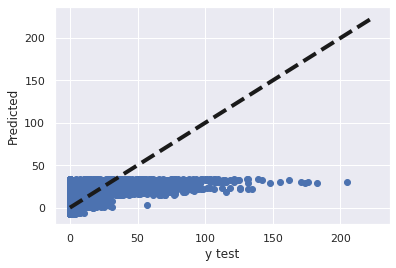

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y test')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
import sklearn.metrics as metrics 
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE: 10.15360775963005
MSE: 257.131439278401
RMSE: 16.035318496319334


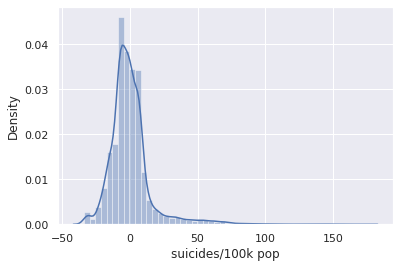

In [ ]:
sns.distplot((y_test-prediction))

In [ ]:
pd.DataFrame(lm.coef_ , x.columns, columns=["Coeffecient"] )

,Coeffecient
year,-0.129689
gdp_per_capita ($),0.000017
G.I. Generation,-0.130840
Generation X,0.700200
Generation Z,2.577700
Millenials,1.120649
Silent,-1.350856
25-34 years,3.383272
35-54 years,6.830520
5-14 years,-9.015224


In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
train_x = train.drop(['suicides/100k pop'], axis = 1)
train_y = train['suicides/100k pop']             

val_x = val.drop(['suicides/100k pop'], axis = 1)
val_y = val['suicides/100k pop']

In [ ]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (18639, 13)
Dimension of train_y dataframe: (18639,)
Dimension of val_x dataframe: (9181, 13)
Dimension of val_y dataframe: (9181,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(train_x, train_y)

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = regr.predict(val_x)
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))
print('Accuracy:',regr.score(val_x,val_y))

Mean Square Error of linear regression: 239.7313718548037
R_Squared Score of linear regression: -1.05858186289385
Accuracy: 0.33439444761384907
